In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style='darkgrid',
    rc={
    'figure.figsize': (15,7)
})

import torch
import torch.nn as nn

In [2]:
class Dump(nn.Module):
  def __init__(self):
    super(Dump, self).__init__()
    self.fc = nn.Linear(1, 1)
    
  def forward(self, x):
    
    return self.fc(x)


model = Dump()

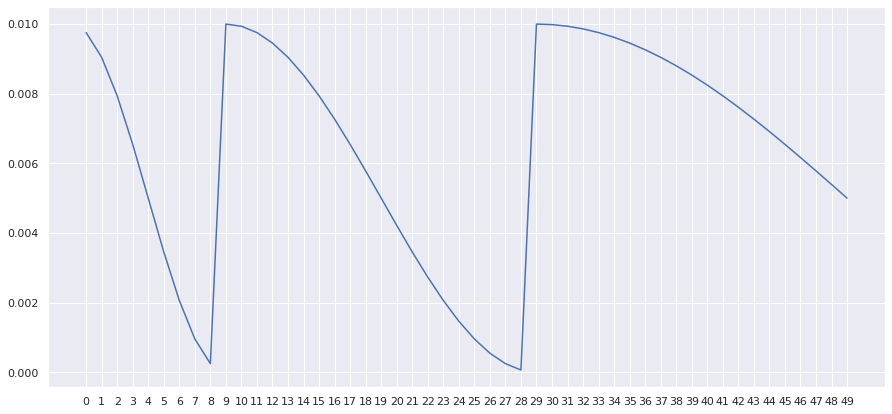

In [3]:
optim = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optim, T_0=10, T_mult=2, eta_min=1e-6)

x = [*range(50)]
y = []

for epoch in x:
    optim.step()
    scheduler.step()
    y.append( scheduler.get_last_lr()[0] )
    
ax = sns.lineplot(x=x, y=y)
ax.set_xticks(x)
plt.show()

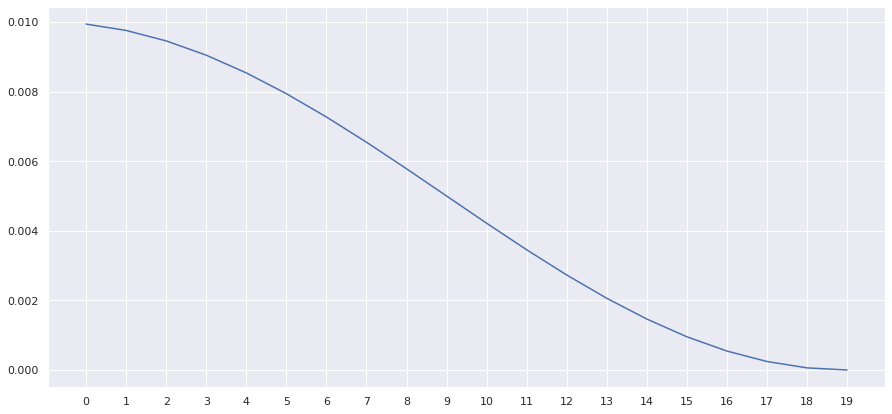

In [7]:
optim = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max=20)

x = [*range(scheduler.state_dict()['T_max'])]
y = []

for epoch in x:
    optim.step()
    scheduler.step()
    y.append( scheduler.get_last_lr()[0] )
    
ax = sns.lineplot(x=x, y=y)
ax.set_xticks(x)
plt.show()

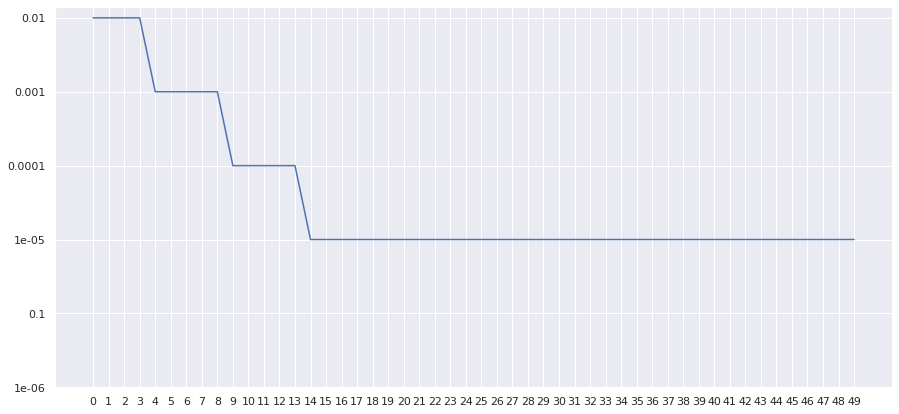

In [5]:
optim = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=3, mode="max",factor=1e-1, min_lr=1e-5)

x = [*range(50)]
y = []

for epoch in x:
    optim.step()
    
    scheduler.step(epoch // 5)
    y.append(scheduler.state_dict()['_last_lr'][0])
    
ax = sns.lineplot(x=x, y=[*map(str, y)])
ax.set_xticks(x)
ax.set_yticks([*map(str, [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6])])
plt.show()

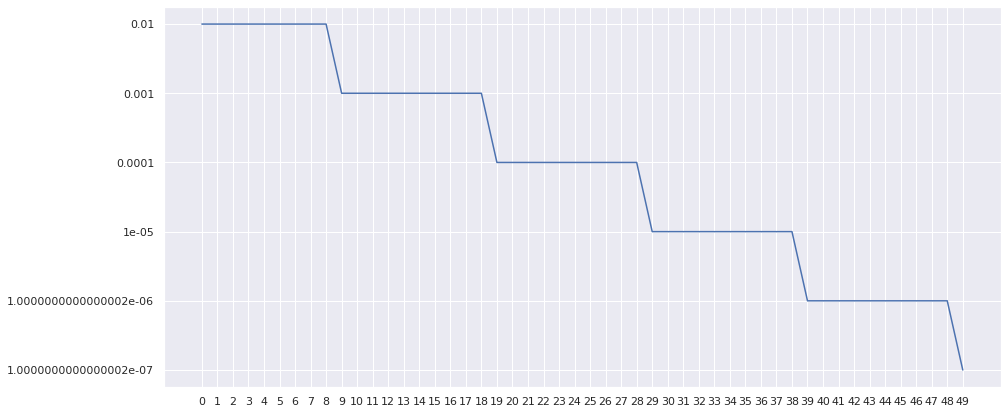

In [44]:
optim = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optim, gamma=0.1, step_size=10)

x = [*range(50)]
y = []

for epoch in x:
    optim.step()
    scheduler.step()
    y.append( scheduler.get_last_lr()[0] )
    
    
ax = sns.lineplot(x=x, y=[*map(str, y)])
ax.set_xticks(x)
plt.show()

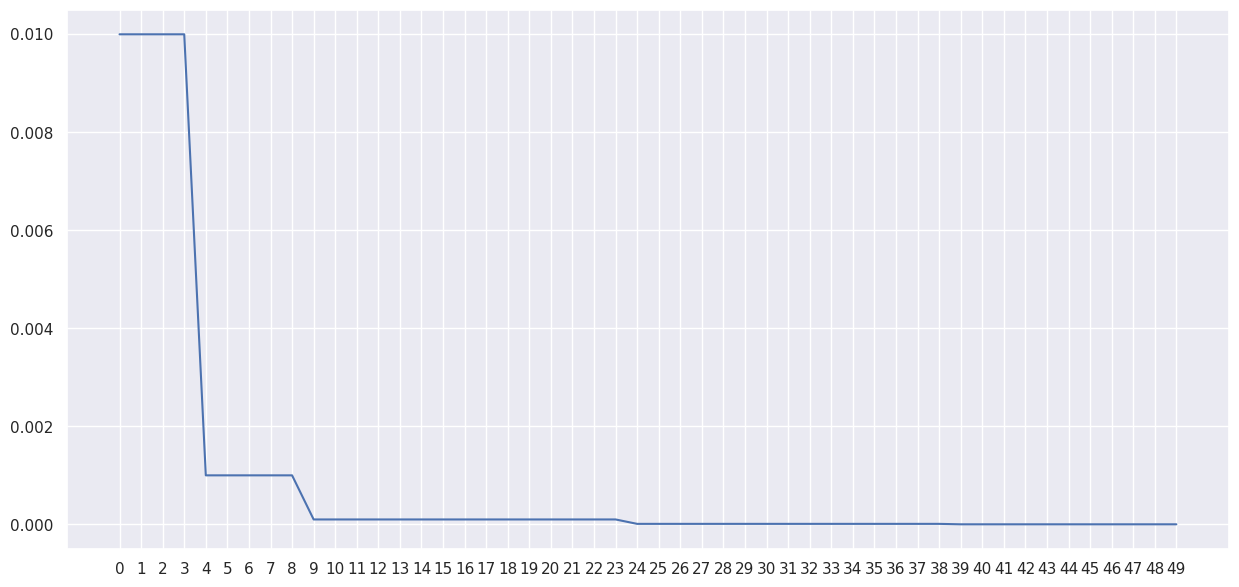

In [9]:
optim = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optim, milestones=[5, 10 ,25, 40])

x = [*range(50)]
y = []

for epoch in x:
    optim.step()
    scheduler.step()
    y.append( scheduler.get_last_lr()[0] )
    
ax = sns.lineplot(x=x, y=y)
ax.set_xticks(x)
plt.show()